# Agrupación - Introducción

En contraste con el aprendizaje automático *supervisado*, el aprendizaje *no supervisado* se usa cuando no hay una "verdad básica" a partir de la cual entrenar y validar las predicciones de las etiquetas. La forma más común de aprendizaje no supervisado es la *agrupación*, que es conceptualmente similar a la *clasificación*, excepto que los datos de entrenamiento no incluyen valores conocidos para la predicción de la etiqueta de clase. La agrupación en clústeres funciona separando los casos de entrenamiento en función de las similitudes que se pueden determinar a partir de sus valores de características. Piénsalo de esta manera; las características numéricas de una entidad determinada se pueden considerar como coordenadas vectoriales que definen la posición de la entidad en el espacio n-dimensional. Lo que busca hacer un modelo de agrupamiento es identificar grupos, o *conglomerados*, de entidades que están cerca unas de otras mientras están separadas de otros conglomerados.

Por ejemplo, echemos un vistazo a un conjunto de datos que contiene medidas de diferentes especies de semillas de trigo.

> **Cita**: El conjunto de datos de semillas utilizado en este ejercicio fue publicado originalmente por el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin, y se puede descargar del repositorio de conjuntos de datos de la UCI (Dua, D. y Graff, C (2019).Repositorio de aprendizaje automático de UCI [http://archive.ics.uci.edu/ml].Irvine, CA: Universidad de California, Escuela de Información y Ciencias de la Computación).

In [7]:
import pandas as pd
import wget

# load the training dataset
wget.download('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv')
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

100% [................................................................................] 9386 / 9386

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
187,10.91,12.80,0.8372,5.088,2.675,4.179
39,14.28,14.17,0.8944,5.397,3.298,6.685
203,12.70,13.41,0.8874,5.183,3.091,8.456
169,11.24,13.00,0.8359,5.090,2.715,3.521
159,11.49,13.22,0.8263,5.304,2.695,5.388
178,11.48,13.05,0.8473,5.180,2.758,5.876
92,18.81,16.29,0.8906,6.272,3.693,3.237
73,19.11,16.26,0.9081,6.154,3.930,2.936
129,17.55,15.66,0.8991,5.791,3.690,5.366
34,15.05,14.68,0.8779,5.712,3.328,2.129


Como puede ver, el conjunto de datos contiene seis puntos de datos (o *características*) para cada instancia (*observación*) de una semilla. Entonces podría interpretarlos como coordenadas que describen la ubicación de cada instancia en un espacio de seis dimensiones.

Ahora, por supuesto, el espacio de seis dimensiones es difícil de visualizar en un mundo tridimensional, o en una trama de dos dimensiones; así que aprovecharemos una técnica matemática llamada *Análisis de componentes principales* (PCA) para analizar las relaciones entre las características y resumir cada observación como coordenadas para dos componentes principales; en otras palabras, traduciremos la característica de seis dimensiones valores en coordenadas bidimensionales.

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

Ahora que tenemos los puntos de datos traducidos a dos dimensiones, podemos visualizarlos en un gráfico:

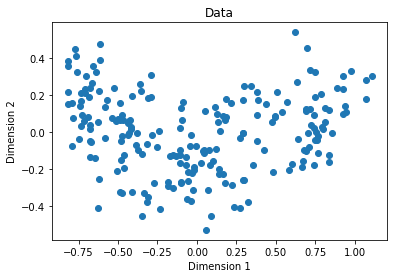

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Es de esperar que pueda ver al menos dos, posiblemente tres, grupos razonablemente distintos de puntos de datos; pero aquí radica uno de los problemas fundamentales con la agrupación en clústeres: sin etiquetas de clase conocidas, ¿cómo sabe en cuántos clústeres debe separar sus datos?

Una forma en que podemos intentar averiguarlo es usar una muestra de datos para crear una serie de modelos de agrupamiento con un número creciente de grupos y medir qué tan estrechamente se agrupan los puntos de datos dentro de cada grupo. Una métrica que se usa a menudo para medir esta estrechez es la *suma de cuadrados dentro del grupo* (WCSS), con valores más bajos que significan que los puntos de datos están más cerca. A continuación, puede trazar el WCSS para cada modelo.

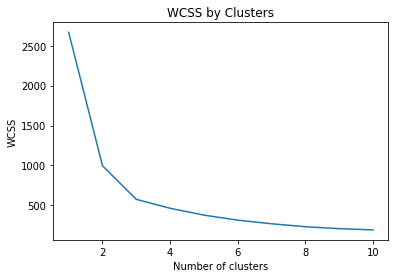

In [11]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

La gráfica muestra una gran reducción en WCSS (por lo tanto, mayor *estrechez*) a medida que el número de grupos aumenta de uno a dos, y una reducción más notable de dos a tres grupos. Después de eso, la reducción es menos pronunciada, lo que da como resultado un "codo" en el gráfico de alrededor de tres grupos. Esta es una buena indicación de que hay dos o tres grupos de puntos de datos razonablemente bien separados.

## Resumen

Aquí analizamos qué significa la agrupación en clústeres y cómo determinar si la agrupación en clústeres podría ser apropiada para sus datos. En el siguiente cuaderno, veremos dos formas de
etiquetando los datos automáticamente.